In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import multivariate_normal as mvn
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DigitRecognition/MNIST_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DigitRecognition/MNIST_test.csv')

In [6]:
X_vi = data.iloc[:,3:]
type(X_vi)

pandas.core.frame.DataFrame

In [8]:
X_vi = X_vi.values.reshape(-1,28,28,1)

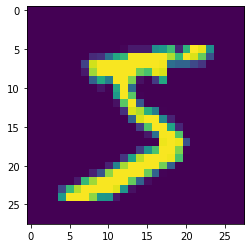

In [10]:
g = plt.imshow(X_vi[0][:,:,0])

In [ ]:
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = data.iloc[:,1:]
df.shape

(60000, 786)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: labels, dtype: int64

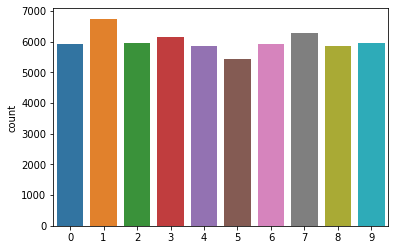

In [37]:
g = sns.countplot(y)

data.iloc[:,2].value_counts()

In [20]:
class GaussBayes():

  def fit(self,X,y,epsilon=1e-3):

    self.likelihoods=dict()
    self.priors=dict()
    self.k = set(y.astype(int))

    for k in self.k:
      X_k = X[y==k,:]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon* np.identity(D)}
      self.priors[k] = len(X_k) / len(X)
  def predict(self,X):
    N,D = X.shape
    P_hat = np.zeros((N,len(self.k)))
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [38]:
data.iloc[:,3:].isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [3]:
X = data.to_numpy()
X

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [4]:
Xt = data_test.to_numpy()


In [5]:
def min_max_scaling(column):
    return (column - column.min())/(column.max() - column.min())

In [6]:
xtest = Xt[:,3:]
xtest = min_max_scaling(xtest)
xtest.shape

(10000, 784)

In [7]:
ytest = Xt[:,2]
ytest

array([7, 2, 1, ..., 4, 5, 6])

In [8]:
x = X[:,3:]
x = min_max_scaling(x)
x.shape

(60000, 784)

In [9]:
y = X[:,2]
y

array([5, 0, 4, ..., 5, 6, 8])

In [54]:
modelGB = GaussBayes()

In [55]:
modelGB.fit(x,y)

In [56]:
y_hatGBtrain = modelGB.predict(x)
y_hatGBtest = modelGB.predict(xtest)

In [10]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [57]:
accuracy(y,y_hatGBtrain)

0.86575

In [58]:
accuracy(ytest,y_hatGBtest)

0.8398

Text(0.5, 42.0, 'Predicted label')

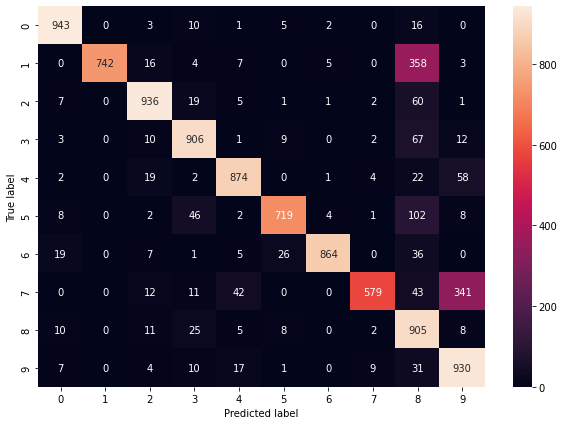

In [46]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(y_hatGBtest, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#KNN

In [11]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y =y.astype(int)
  def predict(self,X, k, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)
    
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights =gamma_k).argmax()
    return y_hat

In [12]:
modelknn = KNNClassifier()

In [13]:
x = X[:,3:]
y = X[:,2]

In [14]:
xtest = Xt[:,3:]
ytest = Xt[:,2]

In [15]:
modelknn.fit(x,y)

In [16]:
y_hatM1train = modelknn.predict(x,12)

In [17]:
accuracy(y,y_hatM1train)

1.0

In [ ]:
y_hatM1 = modelknn.predict(xtest,12)

In [ ]:
accuracy(ytest,y_hatM1)

0.9678

Text(0.5, 42.0, 'Predicted label')

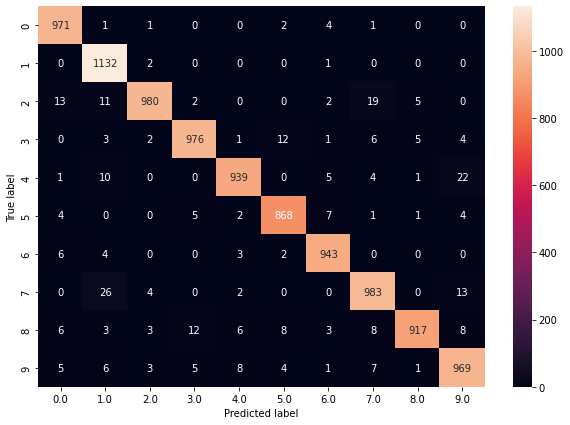

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(y_hatM1, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

###Naive Bayes

In [65]:
class GaussNB():

  def fit(self,X,y, epsilon=1e-3):
    
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k, : ]

      self.likelihoods[k]= {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) +epsilon}
      self.priors[k] = len(X-k)/len(X)


  def predict(self, X):

    N , D = X.shape

    P_hat =np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
    #Bayes Theorem application:
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [66]:
model2d = GaussNB()

In [74]:
model2d.fit(x,y)

In [75]:
y_hatNB = model2d.predict(xtest)

In [76]:
accuracy(ytest,y_hatNB)

0.7746

In [77]:
y_hatNBtrain = model2d.predict(x)

In [78]:
accuracy(y,y_hatNBtrain)

0.7683

Text(0.5, 42.0, 'Predicted label')

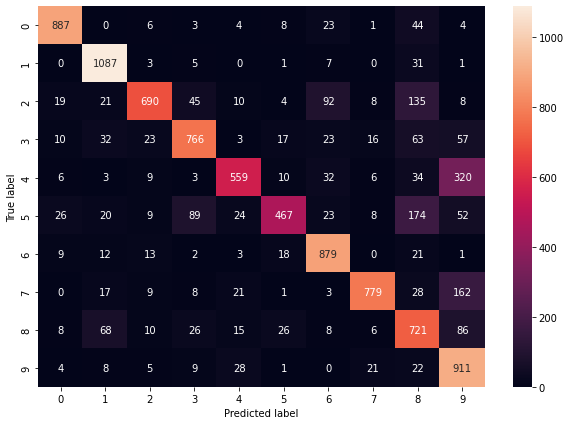

In [79]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(y_hatNB, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')